# Network inference of categorical variables: non-sequential data

In [1]:
import sys
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import inference

In [2]:
# setting parameter:
np.random.seed(1)

In [6]:
s0 = np.loadtxt('s0.txt')

onehot_encoder = OneHotEncoder(sparse=False)
s = onehot_encoder.fit_transform(s0)

n = s0.shape[1]
mx = np.array([len(np.unique(s0[:,i])) for i in range(n)])
mx_cumsum = np.insert(mx.cumsum(),0,0)
i1i2 = np.stack([mx_cumsum[:-1],mx_cumsum[1:]]).T

mx_sum = mx.sum()
w_infer = np.zeros((mx_sum,mx_sum))
h0_infer = np.zeros(mx_sum)
for i in range(n):
    i1,i2 = i1i2[i,0],i1i2[i,1]
    x = np.hstack([s[:,:i1],s[:,i2:]])
    y = s[:,i1:i2]

    w,h0 = inference.fit(x,y,nloop=20)

    w_infer[:i1,i1:i2] = w[:i1,:]
    w_infer[i2:,i1:i2] = w[i1:,:]
    h0_infer[i1:i2] = h0 

In [8]:
w_true = np.loadtxt('w0.txt')
h0_true = np.loadtxt('h0.txt')

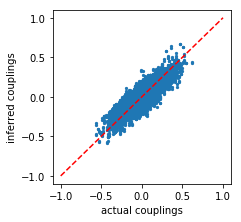

In [9]:
plt.figure(figsize=(3.2,3.2))

plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(w_true,w_infer,marker='o',s=5)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.show()

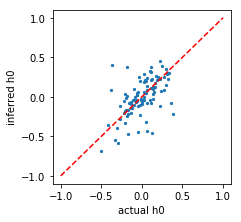

In [10]:
plt.figure(figsize=(3.2,3.2))

plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(h0_true,h0_infer,marker='o',s=5)
plt.xlabel('actual h0')
plt.ylabel('inferred h0')

plt.show()